# Matching of the Vaidya and Robertson-Walker metric Fayos et al
##  Geoff Cope
##  Univeristy of Utah
##  January 1, 2022

https://iopscience.iop.org/article/10.1088/0264-9381/8/11/015/meta

Vacuum field equations done for spherically symmetric case.  Need FRLW and stress energy tensor.  Then do matching.

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,phi,dt,dr,dtheta,dphi = symbols( 't r theta phi dt dr dtheta dphi' ) 

In [4]:
mu = Function('mu')(r,t)
mu

In [5]:
nu = Function('nu')(r,t)
nu

In [6]:
variables = Matrix( [t,r,theta,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [dt,dr,dtheta,dphi] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [8]:
lineElement = expand( - exp(nu)*dt**2 + exp(mu)*(dr**2 + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2)) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  ν(r, t)                                            ⎤
⎢-ℯ            0           0                0         ⎥
⎢                                                     ⎥
⎢            μ(r, t)                                  ⎥
⎢    0      ℯ              0                0         ⎥
⎢                                                     ⎥
⎢                      2  μ(r, t)                     ⎥
⎢    0         0      r ⋅ℯ                  0         ⎥
⎢                                                     ⎥
⎢                                   2  μ(r, t)    2   ⎥
⎣    0         0           0       r ⋅ℯ       ⋅sin (θ)⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  ν(r, t)                                            ⎤
⎢-ℯ            0           0                0         ⎥
⎢                                                     ⎥
⎢            μ(r, t)                                  ⎥
⎢    0      ℯ              0                0         ⎥
⎢                                                     ⎥
⎢                      2  μ(r, t)                     ⎥
⎢    0         0      r ⋅ℯ                  0         ⎥
⎢                                                     ⎥
⎢                                   2  μ(r, t)    2   ⎥
⎣    0         0           0       r ⋅ℯ       ⋅sin (θ)⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t r theta phi")
t,r,theta,phi = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡∂                     ∂                                                                   
⎢⎢──(ν(r, t))           ──(ν(r, t))                                                         
⎢⎢∂t                    ∂r                                                                  
⎢⎢───────────           ───────────                            0                            
⎢⎢     2                     2                                                              
⎢⎢                                                                                          
⎢⎢∂             μ(r, t)  -ν(r, t) ∂                                                         
⎢⎢──(ν(r, t))  ℯ       ⋅ℯ        ⋅──(μ(r, t))                                               
⎢⎢∂r                              ∂t                                                        
⎢⎢───────────  ──────────────────────────────                  0                            
⎢⎢     2                     2                                        

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               2    -μ(r, t
⎢ -μ(r, t) + ν(r, t) ∂           ∂              -μ(r, t) + ν(r, t) ⎛∂          ⎞    ℯ       
⎢ℯ                  ⋅──(μ(r, t))⋅──(ν(r, t))   ℯ                  ⋅⎜──(ν(r, t))⎟            
⎢                    ∂r          ∂r                                ⎝∂r         ⎠            
⎢─────────────────────────────────────────── + ────────────────────────────────── + ────────
⎢                     4                                        4                            
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

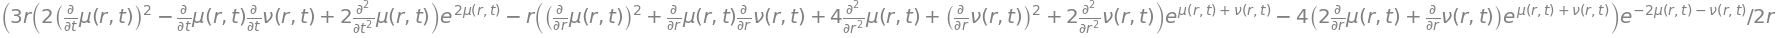

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢    ⎛                                                                                      
⎢    ⎜                                -ν(r, t) ∂           ∂                                
⎢    ⎜                         2   3⋅ℯ        ⋅──(μ(r, t))⋅──(ν(r, t))                 2    
⎢    ⎜   -ν(r, t) ⎛∂          ⎞                ∂t          ∂t               -ν(r, t)  ∂     
⎢0.5⋅⎜3⋅ℯ        ⋅⎜──(μ(r, t))⎟  - ─────────────────────────────────── + 3⋅ℯ        ⋅───(μ(r
⎢    ⎜            ⎝∂t         ⎠                     2                                  2    
⎢    ⎝                                                                               ∂t     
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡     ⎛                            2                           2                    2       
⎢     ⎜       μ(r, t) ⎛∂          ⎞       ν(r, t) ⎛∂          ⎞           ν(r, t)  ∂        
⎢0.25⋅⎜3.0⋅r⋅ℯ       ⋅⎜──(μ(r, t))⎟  - r⋅ℯ       ⋅⎜──(μ(r, t))⎟  - 4.0⋅r⋅ℯ       ⋅───(μ(r, t
⎢     ⎜               ⎝∂t         ⎠               ⎝∂r         ⎠                     2       
⎢     ⎝                                                                           ∂r        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                 r                         
⎢                                                                                           
⎢                                                                                           
⎢                                             ∂           ∂                                 
⎢                                             ──(μ(r, t))⋅──(ν(r, t)) 

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡  ⎛                                                                               2        
⎢  ⎜ -μ(r, t) + ν(r, t) ∂           ∂              -μ(r, t) + ν(r, t) ⎛∂          ⎞       -μ
⎢r⋅⎜ℯ                  ⋅──(μ(r, t))⋅──(ν(r, t)) + ℯ                  ⋅⎜──(ν(r, t))⎟  + 2⋅ℯ  
⎢  ⎜                    ∂r          ∂r                                ⎝∂r         ⎠         
⎢  ⎝                                                                                        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

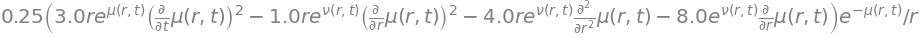

In [25]:
equation4 = einsteinSimplified[0,0]
equation4

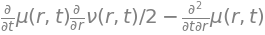

In [29]:
equation5 = einsteinSimplified[0,1]
equation5

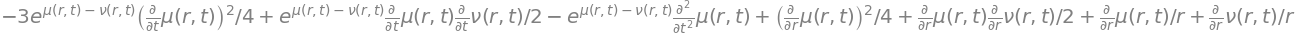

In [30]:
equation6 = einsteinSimplified[1,1]
equation6

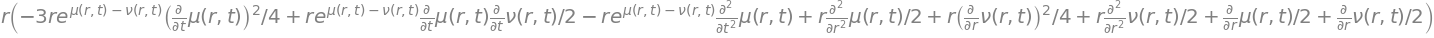

In [31]:
equation7 = einsteinSimplified[2,2]
equation7

In [32]:
#  go back and define a stress energy tensor and set components equal 
vacuumEquationsSpherical = Matrix([equation4,equation5,equation6,equation7])
vacuumEquationsSpherical

⎡                                              2                                            
⎢               μ(r, t) - ν(r, t) ⎛∂          ⎞     μ(r, t) - ν(r, t) ∂           ∂         
⎢            3⋅ℯ                 ⋅⎜──(μ(r, t))⎟    ℯ                 ⋅──(μ(r, t))⋅──(ν(r, t)
⎢                                 ⎝∂t         ⎠                       ∂t          ∂t        
⎢          - ─────────────────────────────────── + ─────────────────────────────────────────
⎢                             4                                        2                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                   ∂       
⎢                                                                                   ──(μ(r, 
⎢                                                                     